## Image Filtering:
- Image filtering changes the range (i.e. the pixel values) of an image, so the colors of the image are altered without changing the pixel positions,          
- The goal of using filters is to modify or enhance image properties and/or to extract valuable information from the pictures such as edges, corners, blobs.  

- Two commonly implemented filters are the moving average filter and the image segmentation filter.                  
- Applying these filters, as seen with the moving average, blurring, and sharpening filters, will produce unwanted artifacts along the edges of the images. To rid of these artifacts, zero padding, edge value replication, mirror extension, or other methods can be used.                          

#### Moving Average Filter:
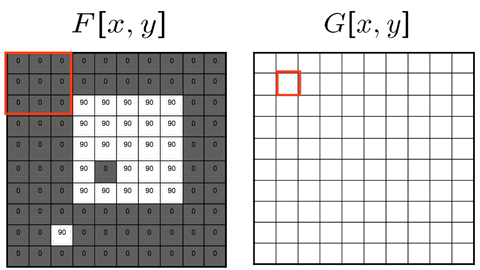         


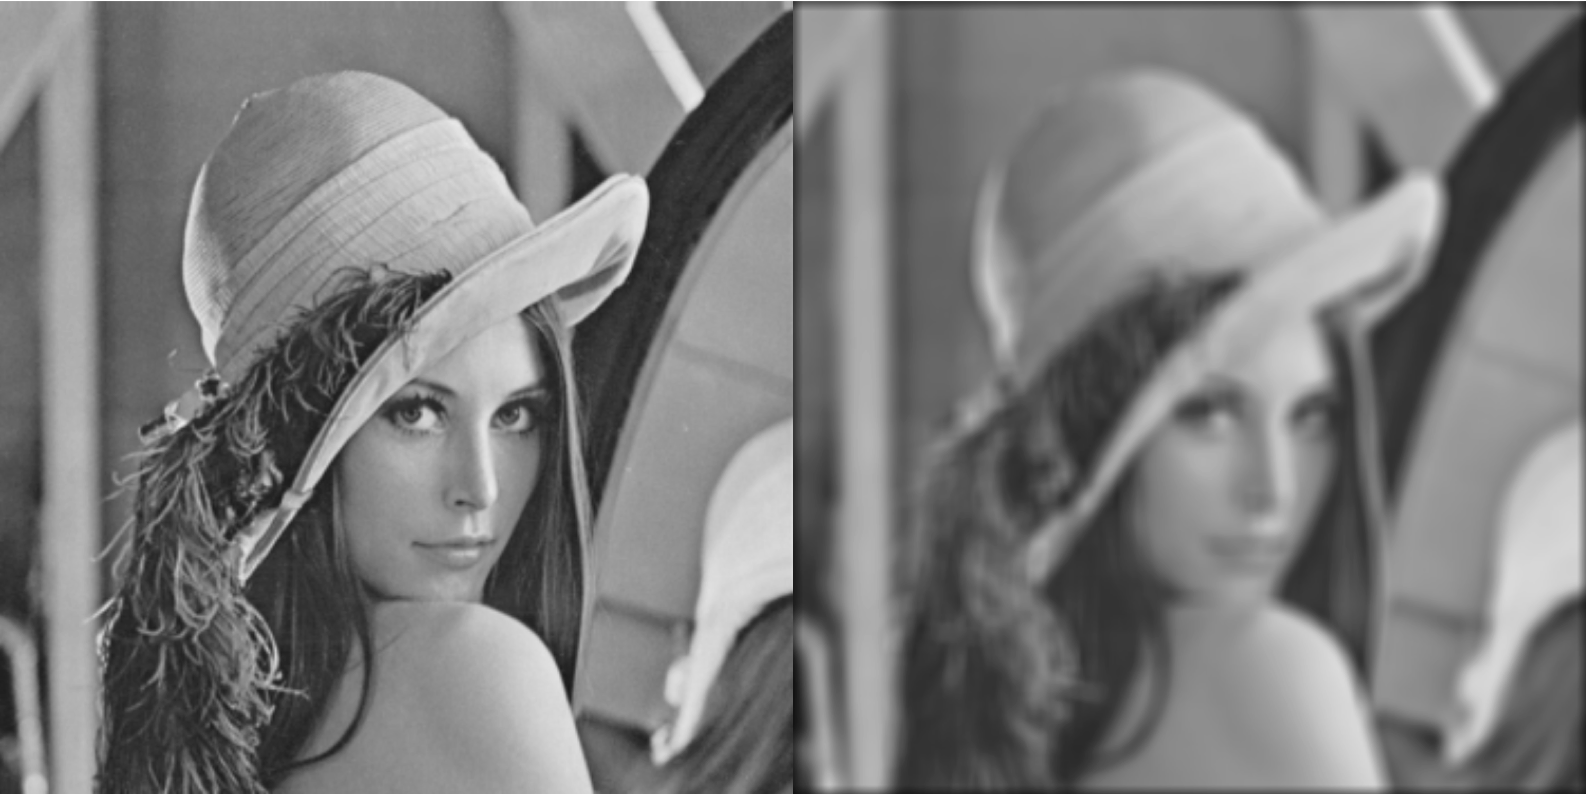

- Image segmentation is the partitioning of an image into regions where the pixels have similar attributes, so the image is represented in a more simplified manner, and so we can then identify objects and boundaries more easily.            

#### Image Segmentation : example - thresholding
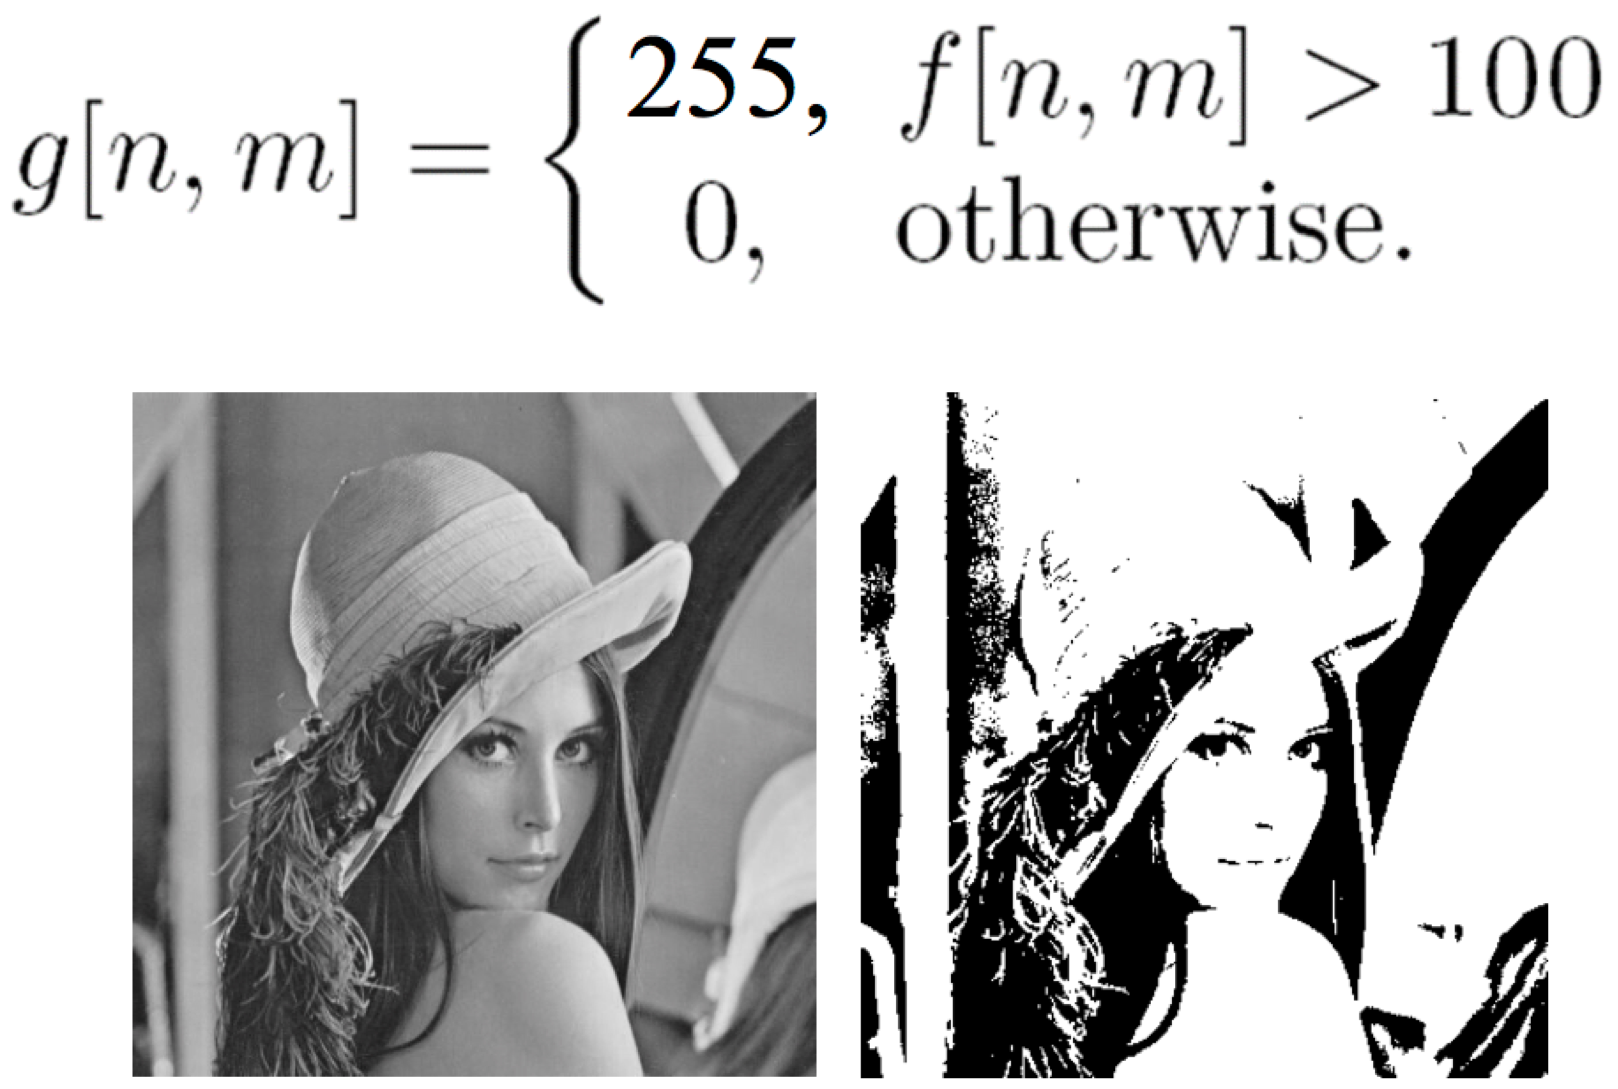

There are different filters available in the image processing:                     
    1. Mean filter
    2. Median filter
    3. Gaussian filter
    4. Bilateral filter
    

Shape:  (619, 512, 3)


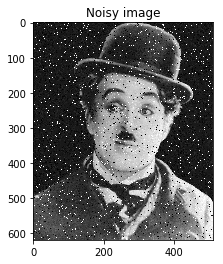

In [7]:
import cv2
import matplotlib.pyplot as plt

# noisy image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# convert to grayscale
gray_img= cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

print("Shape: ",noisy_image.shape)
# plotting
plt.title("Noisy image")
plt.imshow(noisy_image)
plt.show()

Image filtering is a technique used to remove the noise  and smoothens the image

### OpenCV filter functions:      
#### 1. filter2D:    
Convolves an image with the kernel.The function applies an arbitrary linear filter to an image. In this function we can apply any kernel function to filter out the image

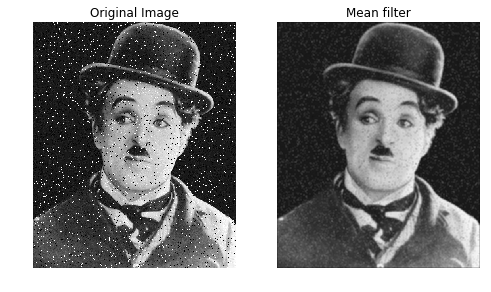

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# filtering with respect to kernels given below

# 1. Mean Filter
kernel= np.ones(shape= (5,5), dtype= np.float32)/25 # 3x3 filter

# 2. Gaussian filter
gaussian_filter= np.array([[1/16, 1/18, 1/16],
                           [1/8, 1/4, 1/8],
                           [1/16, 1/8, 1/16]])

# noisy image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# when ddepth=-1, the output image will have the same depth as the source.
# if you want to apply different kernels to different channels,split the image into separate color planes using split and process them individually.
mean_filter= cv2.filter2D(src= noisy_image, ddepth= -1, kernel= kernel, borderType= cv2.BORDER_CONSTANT)

# plotting the image
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Mean filter")
ax2.axis("off")
ax2.imshow(mean_filter)


#### 2. blur:     
Blurs an image using the normalized box filter (Mean filter) which has equal weights to all the cells in the filters.It consist of only normalized box filter.

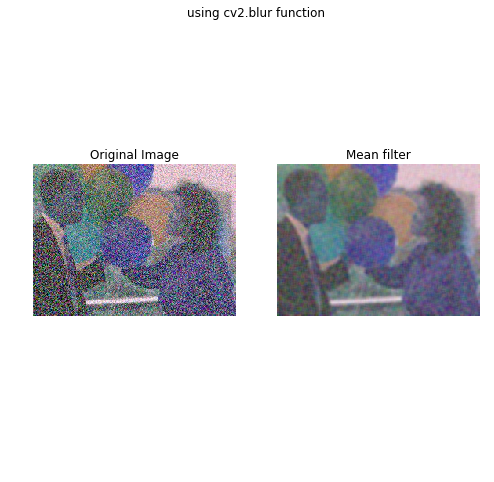

In [25]:
# importing library
import cv2
import matplotlib.pyplot as plt

# noisy image
noisy_image= cv2.imread("./data/noise_image.jpg")

# blur() function is actually a mean filter which takes equal weights
mean_filter= cv2.blur(src= noisy_image, ksize= (5,5), borderType= cv2.BORDER_REPLICATE)

# plotting
fig = plt.figure(figsize = (8,8))
plt.title("using cv2.blur function")
plt.axis("off")

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Mean filter")
ax2.axis("off")
ax2.imshow(mean_filter)


#### 3. boxFilter:
cv2.boxFilter() which is more general, having the option of using either normalized or unnormalized box filter. Just pass an argument normalize=False to the function

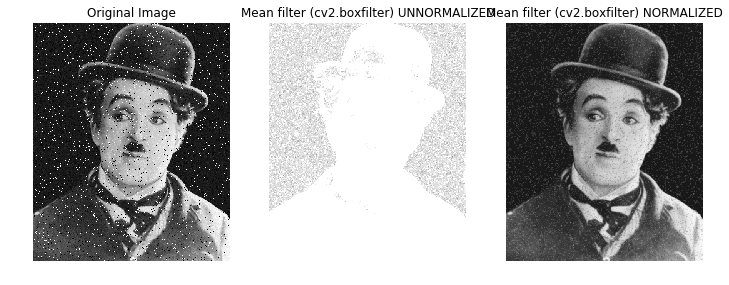

In [35]:
import cv2
import matplotlib.pyplot as plt

# image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# using boxFilter : which can be done both normalized and unnormalized filters as well

# when ddepth=-1, the output image will have the same depth as the source.
boxfilter_unnormalize= cv2.boxFilter(src= noisy_image, ddepth= -1, ksize= (3,3), normalize= False, borderType= cv2.BORDER_REFLECT)

boxfilter_normalize= cv2.boxFilter(src= noisy_image, ddepth= -1, ksize= (3,3), normalize= True, borderType= cv2.BORDER_REFLECT101)

#plotting the image
# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Mean filter (cv2.boxfilter) UNNORMALIZED")
ax2.axis("off")
ax2.imshow(boxfilter_unnormalize)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Mean filter (cv2.boxfilter) NORMALIZED")
ax3.axis("off")
ax3.imshow(boxfilter_normalize)

plt.show()

The filters with unnormalized values forms more darker/brighter as per the value will be more than 255 when we multiply the filter with the image and get the sum.

#### 4. medianBlur:
This is a non-linear filtering technique. As clear from the name, this takes a median of all the pixels under the kernel area and replaces the central element with this median value. This is quite effective in reducing a certain type of noise (like salt-and-pepper noise) with considerably less edge blurring as compared to other linear filters of the same size.           

For an even number of entries, there is more than one possible median, thus kernel size must be odd and greater than 1 for simplicity.           

The median filter uses BORDER_REPLICATE internally to cope with border pixels,

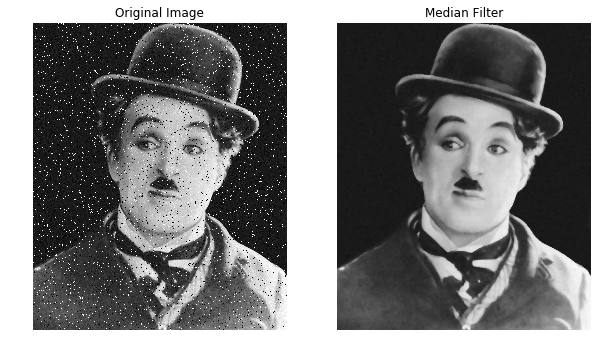

In [40]:
import cv2
import matplotlib.pyplot as plt

# image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# median blur: median value after the multiplication process of kernel
median_blur= cv2.medianBlur(src= noisy_image, ksize= 5)

# plotting the image
fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Median Filter")
ax2.axis("off")
ax2.imshow(median_blur)

plt.show()

#### 5. GaussianBlur:
Technique which uses a gaussian filter, which applies weighted average, as opposed to the uniform average like a mean filter. Based on the distance from the center of the kernel,pixels further from the center have less influence on the weighted average.

one advantage a Gaussian filter has over a median filter is that it's faster because multiplying and adding is probably faster than sorting.

In [ ]:
# 2. Gaussian filter
gaussian_filter= np.array([[1/16, 1/18, 1/16],
                           [1/8, 1/4, 1/8],
                           [1/16, 1/8, 1/16]])

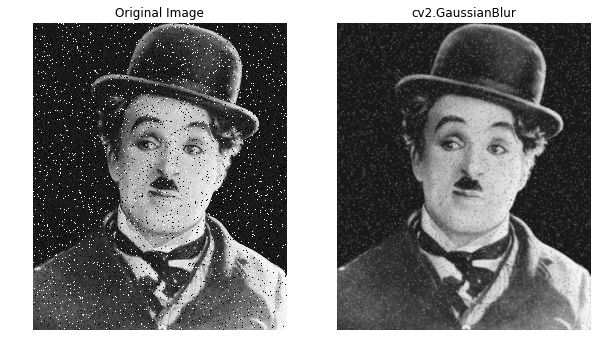

In [5]:
import cv2
import matplotlib.pyplot as plt

# reading image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# Gaussian Blur: inbuilt function which performs by taking weighted average over the part while convolution

# sigmaX - Gaussian kernel standard deviation in X direction
# sigmaY - Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height
gaussian_img= cv2.GaussianBlur(src= noisy_image, ksize= (5,5), sigmaX= 0, sigmaY= 0, borderType= cv2.BORDER_CONSTANT)

#plotting the image
# plotting the image
fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("cv2.GaussianBlur")
ax2.axis("off")
ax2.imshow(gaussian_img)

plt.show()

#### 6. getGaussianKernel:
Returns Gaussian filter coefficients. Two of such generated kernels can be passed to sepFilter2D. Those functions automatically recognize smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them accordingly. You may also use the higher-level GaussianBlur.

#### 7. sepFilter2D:
The function applies a separable linear filter to the image. That is, first, every row of src is filtered with the 1D kernel kernelX. Then, every column of the result is filtered with the 1D kernel kernelY.

In [11]:
import cv2
import matplotlib.pyplot as plt

# reading image
noisy_image= cv2.imread("./data/charlie_noisy.png")

# getting gaussian 1D kernel
cv2.getGaussianKernel(ksize= 5, sigma= 1)


array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

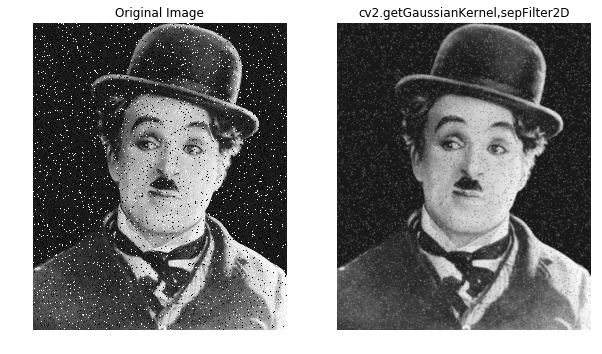

In [13]:
gausskernel_1D= cv2.getGaussianKernel(ksize= 5, sigma= 1)

# this can then be given to the sepFilter2D
output_image= cv2.sepFilter2D(src= noisy_image, ddepth= -1, kernelX= gausskernel_1D, kernelY= gausskernel_1D)

# plotting the result
fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("cv2.getGaussianKernel,sepFilter2D")
ax2.axis("off")
ax2.imshow(output_image)

plt.show()

#### 5. bilateralFilter:
 bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is very slow compared to most filters,which is known as edge-preserving smoothing.       
 
 Sigma values: For simplicity, you can set the 2 sigma values to be the same. If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look "cartoonish".             
 
 these convolutions often result in a loss of important edge information, since they blur out everything, irrespective of it being noise or an edge. To counter this problem, the non-linear bilateral filter was introduced.

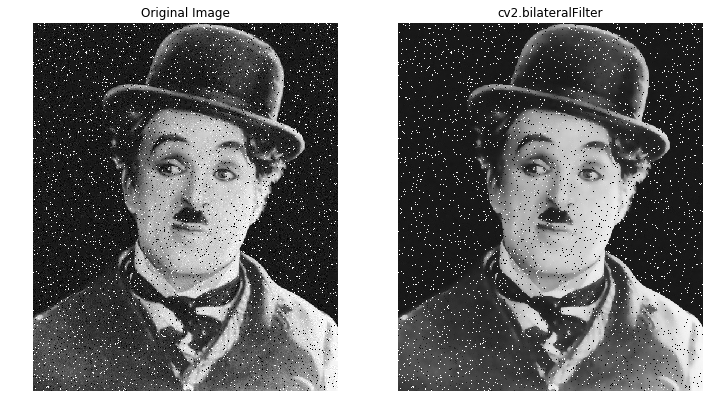

In [28]:
import cv2
import matplotlib.pyplot as plt

# image
noisy_image= cv2.imread('./data/charlie_noisy.png')

# bilateral filter: edge preserving smoothing

# d - Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
# sigmaColor - Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
# sigmaSpace - Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

bilateral_img= cv2.bilateralFilter(src= noisy_image, d= 8, sigmaColor= 80, sigmaSpace= 80)


# plotting the image
fig= plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(noisy_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("cv2.bilateralFilter")
ax2.axis("off")
ax2.imshow(bilateral_img)

plt.show()

#### 6. Sobel Operator:
The Sobel Operator **detects edges that are marked by sudden changes in pixel intensity**, as shown in the figure below. The rise in intensity is even more evident, when we plot the first derivative of the intensity function.

Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less resistant to the noise. Most often, the function is called with ( xorder = 1, yorder = 0, ksize = 3) or ( xorder = 0, yorder = 1, ksize = 3) to calculate the first x- or y- image derivative. 

In [30]:
# ( xorder = 1, yorder = 0, ksize = 3)
sobel_x = [[-1,0,1],
           [-2,0,2],
           [-1,0,1]]

# ( xorder = 0, yorder = 1, ksize = 3)
sobel_y = [[-1,-2,-1],
           [ 0, 0, 0],
           [ 1, 2, 1]]

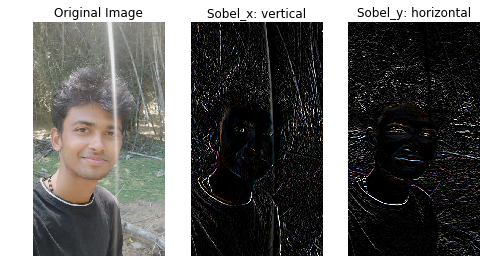

In [38]:
# import librari
import cv2
import matplotlib.pyplot as plt

# reading an image
input_image= cv2.imread("./data/hari_1.png")

# convert to rgb
input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Sobel filter both x and y ie,. horizontal and vertical filter

# vertical
sobel_x= cv2.Sobel(src= input_image, ddepth= -1, dx= 1,dy= 0, ksize= 3)

# horizontal
sobel_y= cv2.Sobel(src= input_image, ddepth= -1, dx= 0,dy= 1, ksize= 3)

#plotting the image
# plotting
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(input_image)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Sobel_x: vertical")
ax2.axis("off")
ax2.imshow(sobel_x)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Sobel_y: horizontal")
ax3.axis("off")
ax3.imshow(sobel_y)

plt.show()

#### 7.Scharr Filter:
Calculates the first x- or y- image derivative using Scharr operator.

The function computes the first x- or y- spatial image derivative using the Scharr operator. 

In [40]:
# ( xorder = 1, yorder = 0, ksize = 3)
scharr_x= [[-3, 0, 3],
           [-10,0,10],
           [-3, 0, 3]]

# ( xorder = 0, yorder = 1, ksize = 3)
scharr_y= [[-3, -10, -3],
           [ 0,   0,  0],
           [ 3,  10,  3]]

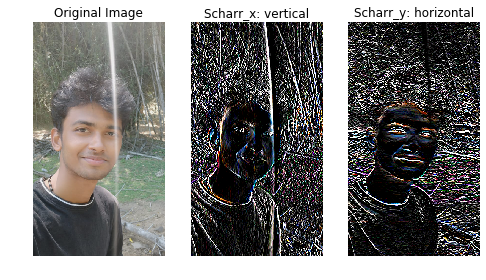

In [41]:
# importing lib
import cv2
import matplotlib.pyplot as plt

# reading image
input_image= cv2.imread("./data/hari_1.png")
input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Scharr filter:
# vertical
scharr_x= cv2.Scharr(src= input_image, ddepth= -1, dx= 1,dy= 0)
# horizontal
scharr_y = cv2.Scharr(src= input_image, ddepth= -1, dx= 0,dy= 1)

#plotting the image
# plotting
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(input_image)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Scharr_x: vertical")
ax2.axis("off")
ax2.imshow(scharr_x)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Scharr_y: horizontal")
ax3.axis("off")
ax3.imshow(scharr_y)

plt.show()

#### 8. Laplacian:
Calculates the Laplacian of an image.

The function calculates the Laplacian of the source image by adding up the second x and y derivatives calculated using the Sobel operator

https://www.tutorialspoint.com/dip/laplacian_operator.htm

In [42]:
# positive laplacian operator
lap_positive= [[0, 1, 0],
               [1, -4,1],
               [0, 1, 0]]

# Negative laplacian operator
lap_negative= [[0, -1, 0],
               [-1, 4,-1],
               [0, -1, 0]]

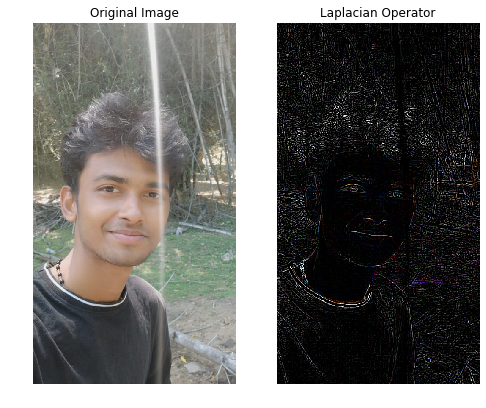

In [48]:
import cv2
import matplotlib.pyplot as plt

# reading an image
input_image= cv2.imread("./data/hari_1.png")

input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Laplacian operator
lap_img= cv2.Laplacian(src= input_image, ddepth= -1, ksize= 3)

#plot
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(input_image)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Laplacian Operator")
ax2.axis("off")
ax2.imshow(lap_img)

